## V. Exercise 3 : Text classification on the Ohsumed dataset

The goal of this exercise is to realize a text classifier using deep neural networks. Your task is to construct a classifier, using the available training set, and evaluate it using the test set. The classifier should predict the category for the articles.

Dataset : We will work with the Ohsumed dataset that contains abstracts of scientific articles from a large medical publication database. The articles are related to one of 23 categories of cardiovascular diseases. ```IMDB_Dataset.zip```

Dataset description : The dataset has two versions :
- One that contains the first 20000 articles (split into training and test set), available on Moodle ;
- A more complete version that has all articles (50000 articles), available here.

You should work with the version that has 20000 articles, and only use the complete version only once you constructed and analyzed an efficient classifier for the smaller set. As usual, the dataset is split into two parts : a training set and a test set. Each article of the collection is labeled with one of the 23 categories. 

Overall strategy : To realize a classifier you should use an iterative approach : try to realize a simple classifier first, then analyze its performances (e.g. using the accuracy metric), then chose techniques to improve the performance (in terms of accuracy) of your classifier. 

Try to describe and document the development process in your report : which experiments did you run ? What were the results ? What did you
do to improve the performance and why ?
To implement your first text classifier from scratch, we advise you to :
- Look into the data, get familiar with its structure and the type of text you will process ;
- Explore the data and compute some basic statistics. For example, what is the size of the vocabulary ?

What is the number of examples in the training/test set per category ? What is the frequency of the words ? What is the most common, the least common ? Feel free to add anything you find relevant on the dataset ;

- Preprocessing : adjust your data to be able to pass them into a neural network ;
- Create a neural network with a simple architecture and train it ;
- Evaluate the performance of your classifier on the training set and the test set. These numbers can give hints about the quality of your classifier and can also can guide you to decide what to do in order to improve the performance. Beware of under-fitting and over-fitting ;
- Interpret your results (in plain text) and set your next objective (for example, if you had an over-fitting and you decide to add regularization, explain it) ;
- Iterate (many many many times) and try to improve your model. Tunning a network is sometimes difficult due to all the possibilities for the hyper-parameters. 

In order to improve your network during your iterations, you can try to :
- Invest time to do more preprocessing. For example, remove frequent words, remove stopwords, perform stemming. A quick introduction here ;
- Change the parameters of your algorithms and your optimizers, cost functions, etc ;
- Add dropout, early stopping, regularization ;
- Change the network topology/use different techniques (multilayer perceptron, LSTM, etc) ;
- Only when you managed to obtain good results, witch to the bigger dataset.


| Category                                                 | Code |
|----------------------------------------------------------|------|
| Bacterial Infections and Mycoses                         | C01  |
| Virus Diseases                                           | C02  |
| Parasitic Diseases                                       | C03  |
| Neoplasms                                                | C04  |
| Musculoskeletal Diseases                                 | C05  |
| Digestive System Diseases                                | C06  |
| Stomatognathic Diseases                                  | C07  |
| Respiratory Tract Diseases                               | C08  |
| Otorhinolaryngologic Diseases                            | C09  |
| Nervous System Diseases                                  | C10  |
| Eye Diseases                                             | C11  |
| Urologic and Male Genital Diseases                       | C12  |
| Female Genital Diseases and Pregnancy Complications      | C13  |
| Cardiovascular Diseases                                  | C14  |
| Hemic and Lymphatic Diseases                             | C15  |
| Neonatal Diseases and Abnormalities                      | C16  |
| Skin and Connective Tissue Diseases                      | C17  |
| Nutritional and Metabolic Diseases                       | C18  |
| Endocrine Diseases                                       | C19  |
| Immunologic Diseases                                     | C20  |
| Disorders of Environmental Origin                        | C21  |
| Animal Diseases                                          | C22  |
| Pathological Conditions, Signs and Symptoms              | C23  |


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import tensorflow as tf

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Flatten, Dense, Dropout
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout


from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import accuracy_score

import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from collections import Counter

nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [ ]:
# Function for files retrieving and arrays filling

def list_files_recursive_and_fill_arrays(directory, texts, cat):
    for root, dirs, files in os.walk(directory):
        for file in files:
            path = str(root) + "/" + str(file)
            #print(path)
            with open(path, 'r', encoding='utf-8') as f:
              content = f.read()
              texts.append(content)
              cat.append(path.split('/')[7])


In [ ]:
test_dataset_path = "/content/drive/MyDrive/Dataset/ohsumed-first-20000-docs/test"
train_dataset_path = "/content/drive/MyDrive/Dataset/ohsumed-first-20000-docs/training"

test_texts = []
train_texts = []
test_cat_code = []
train_cat_code = []

list_files_recursive_and_fill_arrays(test_dataset_path, test_texts, test_cat_code)
list_files_recursive_and_fill_arrays(train_dataset_path, train_texts, train_cat_code)

In [ ]:
def show_wordcloud(texts):
  text = ' '.join(texts)
  wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)
  plt.figure(figsize=(10, 5))
  plt.imshow(wordcloud, interpolation='bilinear')
  plt.axis('off')
  plt.show()


stopwords = []

def show_top_words(texts, count):
  all_tokens = [word for text in texts for word in text.split()]
  word_freq = Counter(all_tokens)
  stopwords = word_freq.most_common(count)
  #print("\n", stopwords, "\n")
  plt.figure(figsize=(12, 6))
  plt.bar([word[0] for word in stopwords], [word[1] for word in stopwords])
  plt.xlabel('Words')
  plt.ylabel('Frequency')
  plt.title('Top 100 Most Frequent Words')
  plt.xticks(rotation=90, ha='right')
  plt.show()


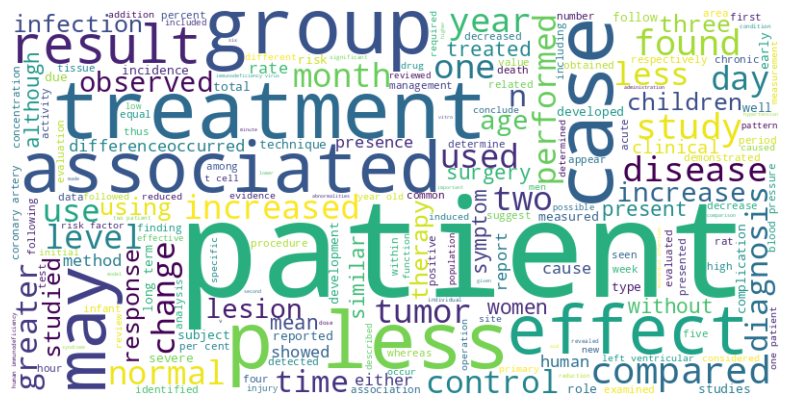

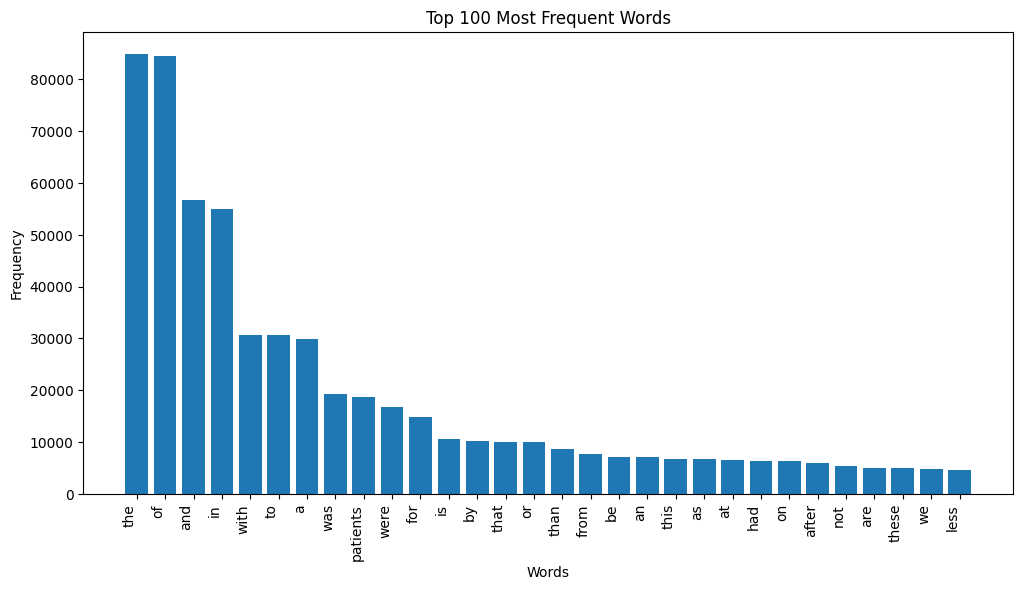

set()

Size of test set:  12733
Size of train set:  10433
Total: 23166


In [ ]:
show_wordcloud(train_texts)
print("\n")
show_top_words(train_texts, 30)

print(stopwords)

# Stats
print("\nSize of test set: ", len(test_texts))
print("Size of train set: ", len(train_texts))
print("Total:", len(train_texts) + len(test_texts))

In [ ]:
# conversion majuscule to minuscule
X_train = [[tokenizer.index_word.get(word_index, '').lower() for word_index in sequence] for sequence in X_train]
X_test = [[tokenizer.index_word.get(word_index, '').lower() for word_index in sequence] for sequence in X_test]


#### TODO : Enlever les mots trop récurrents / connecteurs
#stopwords = set(stopwords)


print(X_train_t[0])

#### TODO : Enlever les chiffres

print(X_train[0])

tokenizer = Tokenizer(num_words=max_words)
tokenizer.fit_on_texts(train_texts)

X_train = tokenizer.texts_to_sequences(train_texts)
X_test = tokenizer.texts_to_sequences(test_texts)

X_train = pad_sequences(X_train, maxlen=max_sequence_length)
X_test = pad_sequences(X_test, maxlen=max_sequence_length)

label_encoder = LabelEncoder()
y_train = label_encoder.fit_transform(train_cat_code)
y_test = label_encoder.transform(test_cat_code)

embedding_dim = 50 # hyperparam : Words in the dataset will be represented by a vector of 50 dimensions in the embedding space

[]
['relapse', 'in', 'children', 'with', 'acute', 'lymphoblastic', 'leukemia', 'all', 'a', 'double', 'concentrate', 'method', 'of', 'preparation', 'was', 'used', 'to', 'analyze', 'consecutive', 'csf', 'specimens', 'from', 'children', 'with', 'all', 'between', 'january', '1', '1982', 'and', 'september', '30', '1988', 'one', 'hundred', 'nine', 'csf', 'specimens', 'from', '58', 'evaluable', 'children', 'had', 'less', 'than', '6', 'leukocytes', 'and', 'more', 'than', '5', 'blasts', 'on', 'differential', 'count', 'low', 'cell', 'count', 'specimen', 'with', 'blasts', 'during', 'the', 'study', 'period', '25', 'of', 'evaluable', 'children', '7', '5', 'had', 'cns', 'leukemic', 'recurrence', 'in', '22', 'of', '25', '88', 'the', 'cns', 'relapse', 'was', 'preceded', 'by', 'at', 'least', 'one', 'abnormal', 'low', 'cell', 'count', 'csf', 'specimen', 'one', 'of', '34', 'patients', 'with', 'a', 'single', 'at', 'diagnosis', '3', 'had', 'subsequent', 'cns', 'relapse', 'compared', 'with', 'five', 'of', '

In [ ]:
# Checking dropouts
print(X_train[0])

[1491    4  129    6   90 3843  586   46    7  653 7417  400    2 2483
    9   99    5 5481  596  736  489   18  129    6   46   56 2080   19
 2581    3 5369  181  952   47 1073  373  736  489   18 1180 3304  129
   26   33   16   49 3329    3   62   16   37 5895   25 1363 1425  159
   54 1425 1499    6 5895   45    1   44  201  216    2 3304  129   69
   37   26 1568 3048  524    4  366    2  216 1290    1 1568 1491    9
 3131   15   24  547   47  412  159   54 1425  736 1499   47    2  649
    8    6    7  376   24  100   36   26  666 1568 1491   82    6  150
    2  259    8 1049   37    6    7  376   45 1514   35   17 5896    2
  231  129    6   41   13   62   45 1514  373 1149   26 1568 1491  799
   15  525  685  377  185  499    8    4   22   39   10    5   21    4
 1568 1491   25    1  789    2  110 3159  355 3543 1568  524 1462    4
  238  470  365   25    7 2884    2    1 3544    2 1568  586  578  430
    1  450    2  666 1038  703   13 2114  326  278 1603    2 1568 8677
  928 

In [ ]:
model = Sequential()
model.add(Embedding(input_dim=max_words, output_dim=embedding_dim, input_length=max_sequence_length))
model.add(LSTM(128))  # La couche LSTM prend en charge les séquences d'entrée directement
model.add(Dropout(0.7))
model.add(Dense(128, activation='relu'))
model.add(Dense(len(set(train_cat_code)), activation='softmax'))

In [ ]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential_12"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_11 (Embedding)    (None, 200, 50)           500000    
                                                                 
 lstm_2 (LSTM)               (None, 128)               91648     
                                                                 
 dropout_6 (Dropout)         (None, 128)               0         
                                                                 
 dense_15 (Dense)            (None, 128)               16512     
                                                                 
 dense_16 (Dense)            (None, 23)                2967      
                                                                 
Total params: 611127 (2.33 MB)
Trainable params: 611127 (2.33 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
epochs = 20
batch_size = 32
history = model.fit(X_train, y_train, epochs=epochs, batch_size=batch_size, validation_split=0.2)

Epoch 1/20
261/261 [==============================] - 85s 318ms/step - loss: 2.6599 - accuracy: 0.1997 - val_loss: 6.9006 - val_accuracy: 0.0000e+00
Epoch 2/20
261/261 [==============================] - 86s 332ms/step - loss: 2.5201 - accuracy: 0.2289 - val_loss: 7.0187 - val_accuracy: 0.0000e+00
Epoch 3/20
261/261 [==============================] - 88s 337ms/step - loss: 2.3570 - accuracy: 0.2600 - val_loss: 8.7808 - val_accuracy: 0.0000e+00
Epoch 4/20
261/261 [==============================] - 83s 320ms/step - loss: 2.1575 - accuracy: 0.3090 - val_loss: 10.1437 - val_accuracy: 0.0000e+00
Epoch 5/20
261/261 [==============================] - 87s 334ms/step - loss: 1.9368 - accuracy: 0.3676 - val_loss: 11.7091 - val_accuracy: 0.0000e+00
Epoch 6/20
261/261 [==============================] - 79s 302ms/step - loss: 1.7517 - accuracy: 0.4333 - val_loss: 13.1017 - val_accuracy: 0.0000e+00
Epoch 7/20
261/261 [==============================] - 82s 314ms/step - loss: 1.5969 - accuracy: 0.4722 

In [ ]:
y_pred = model.predict(X_test)

398/398 [==============================] - 42s 105ms/step


In [ ]:
y_pred = np.argmax(y_pred, axis=1)
print(y_pred)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy : ", accuracy)

[ 5 16 17 ... 22 19 19]
Accuracy :  0.22916830283515274
